# Deconvolution Visualization

## Where the data at?

In [1]:
input_path = '../Data/Processed_Data/'
output_path = '../Data/Processed_Data/Cell_Deconvolution/'

## Interpreting Results

In [2]:
import pandas as pd

# Read deconvolution results

deconv = pd.read_csv(output_path+'Results_TrainData_ARIC.csv', index_col=0)
deconv_test = pd.read_csv(output_path+'Results_TestData_ARIC.csv', index_col=0)

# Get basic statistics of deconvolution results
round(deconv.T.describe(),2)

cell types,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,NK,Neu,Treg
count,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00
mean,0.11,0.02,0.12,0.02,0.05,0.01,0.05,0.05,0.34,0.05,0.15,0.02
std,0.09,0.02,0.07,0.02,0.05,0.02,0.04,0.04,0.18,0.03,0.10,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.05,0.01,0.07,0.00,0.02,0.00,0.03,0.03,0.20,0.03,0.09,0.01
50%,0.09,0.02,0.11,0.01,0.04,0.00,0.05,0.05,0.32,0.05,0.13,0.02
75%,0.14,0.03,0.15,0.02,0.07,0.02,0.07,0.07,0.47,0.07,0.18,0.03
max,0.57,0.19,0.68,0.14,0.64,0.20,0.30,0.69,0.92,0.27,0.58,0.12


In [3]:
round(deconv_test.T.describe(),2)

cell types,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,NK,Neu,Treg
count,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00
mean,0.09,0.02,0.12,0.02,0.04,0.01,0.04,0.04,0.42,0.05,0.13,0.02
std,0.09,0.02,0.10,0.02,0.04,0.01,0.03,0.03,0.19,0.03,0.09,0.02
min,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
25%,0.03,0.00,0.07,0.00,0.01,0.00,0.02,0.02,0.29,0.03,0.07,0.01
50%,0.07,0.01,0.11,0.01,0.03,0.00,0.03,0.03,0.42,0.05,0.12,0.01
75%,0.13,0.02,0.15,0.03,0.06,0.01,0.06,0.05,0.55,0.07,0.16,0.02
max,0.47,0.21,0.72,0.09,0.23,0.13,0.15,0.17,0.90,0.18,0.51,0.09


In [4]:
# Import Plotting Functions
from FM_Functions.Data_Visualization import *

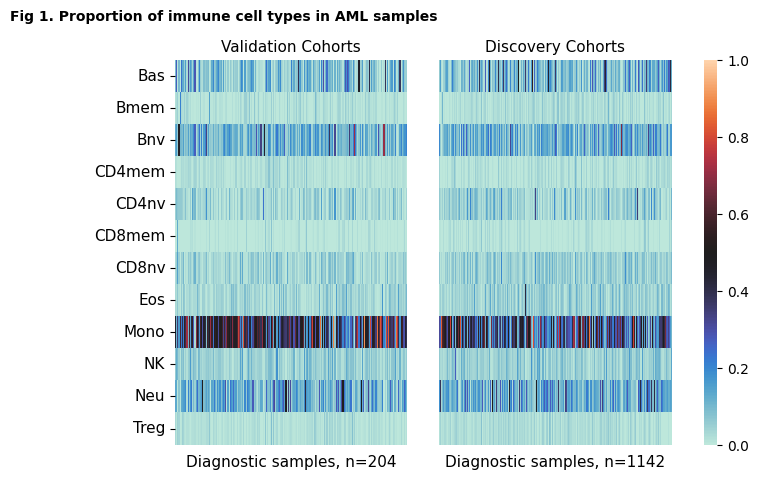

In [5]:
deconv.index.name = None
deconv_test.index.name = None
draw_heatmaps(fig_title = 'Proportion of immune cell types in AML samples',
            t1='Validation Cohorts', t2= 'Discovery Cohorts',
            df1 = deconv_test, df2 = deconv,
            save_plot=False, fig_number=1, figsize=(7,5))

## Import CIBERSORTx Results

In [6]:
df = pd.read_csv(output_path+'COG_clinicaldata_ciberscore_FMcleaned.csv')

# break 'Mixture' column by '-' and add to df
df['Patient_ID'] = df['Mixture'].str.split('-', expand=True)[2]

# Set index to Patient ID
df = df.set_index('Patient_ID')

# Remove induction failure patients
df = df[df['Tumor Code'] == '20 - Acute myeloid leukemia (AML)']

# Select columns of interest
cibersortx = df.iloc[:,1:23].join(df[['LSC6','pLSC6_gb']])

y = pd.read_csv(input_path+'y.csv', index_col=0)

# Split data into training and test sets by clinical trial
y_train = y[~y['Clinical Trial'].isin(['AML02','AML08'])]

# Add cibersortx to y_train
y_train2 = y_train.drop(columns=['pLSC6_gb']).join(cibersortx, how='inner', on='Patient_ID')

In [32]:
y_train3 = y_train2.iloc[:,-24:-2]

In [33]:
y_train3

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
201005010090_R03C01,0.037192,0.226231,0.014037,0.074382,0.000000,0.105324,0.043664,0.004744,0.0,0.000000,...,0.174146,0.000000,0.001035,0.070450,0.000000,0.004721,0.018085,0.006314,0.142891,0.004537
201005010034_R05C01,0.066217,0.061484,0.044736,0.030543,0.000000,0.039400,0.000000,0.039093,0.0,0.000000,...,0.125846,0.014879,0.000000,0.000000,0.000000,0.005531,0.083392,0.130835,0.271948,0.054850
201005010090_R02C01,0.031598,0.166835,0.000000,0.053999,0.000000,0.086400,0.000000,0.006481,0.0,0.086595,...,0.183342,0.000000,0.002471,0.028794,0.004481,0.000000,0.165865,0.033646,0.087662,0.000000
201005010034_R06C01,0.024600,0.094468,0.038663,0.016831,0.000000,0.013115,0.008806,0.000000,0.0,0.039376,...,0.465513,0.000000,0.000000,0.095440,0.000000,0.000000,0.040288,0.008254,0.076989,0.061646
201005010090_R04C01,0.067200,0.021298,0.019304,0.077616,0.000000,0.071045,0.021777,0.000000,0.0,0.000000,...,0.270368,0.000000,0.009317,0.068413,0.000000,0.023050,0.000000,0.122364,0.175985,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02b94d3d-2b6f-4c7a-9554-8e6256ddc791_noid,0.027896,0.206052,0.000000,0.018147,0.012090,0.096457,0.000000,0.000000,0.0,0.000000,...,0.288100,0.000000,0.004592,0.075718,0.000000,0.001027,0.000000,0.048436,0.147923,0.000000
0066d4af-8019-46a0-ba29-d2962c9537a7_noid,0.000000,0.185927,0.009221,0.070143,0.000000,0.178663,0.000000,0.036592,0.0,0.000000,...,0.071742,0.000000,0.007779,0.057803,0.019072,0.000000,0.100177,0.000000,0.219573,0.011373
e844b417-c4ad-41db-b361-e93e3c88d3f3_noid,0.104493,0.047687,0.006538,0.011602,0.010806,0.038082,0.011821,0.000000,0.0,0.000000,...,0.547315,0.001495,0.000000,0.024435,0.000000,0.004484,0.008354,0.000000,0.133112,0.000000
2483113d-8f2a-4a3c-b394-b734019c9c41_noid,0.121594,0.110960,0.172528,0.022535,0.000000,0.121526,0.009456,0.002483,0.0,0.000000,...,0.298019,0.000000,0.000000,0.015906,0.000000,0.004651,0.000022,0.030713,0.050097,0.000000


In [34]:
deconv2 = deconv.T.loc[y_train3.index]

In [40]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def compute_correlation(df1, df2):
    """
    Computes the correlation between columns of two dataframes.
    Returns a dataframe with the correlation values.

    Parameters:
        df1 (pandas.DataFrame): First dataframe.
        df2 (pandas.DataFrame): Second dataframe.

    Returns:
        pandas.DataFrame: Dataframe with correlation values.
    """
    
    # Compute the number of columns in each dataframe
    n1, n2 = len(df1.columns), len(df2.columns)

    # Initialize an empty dataframe to store correlation values
    corr_df = pd.DataFrame(index=df1.columns, columns=df2.columns)

    # Loop over the columns of each dataframe
    for i in tqdm(range(n1)):
        col1 = df1.iloc[:, i]
        for j in range(n2):
            col2 = df2.iloc[:, j]

            # Compute the correlation between the two columns
            corr = np.corrcoef(col1, col2)[0, 1]

            # Store the correlation value in the appropriate position in the output dataframe
            corr_df.iloc[i, j] = corr

    return corr_df

df_corr = compute_correlation(y_train3, deconv2)

100%|██████████| 22/22 [00:00<00:00, 528.35it/s]


In [41]:
df_corr

,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,NK,Neu,Treg
B cells naive,0.076953,0.016038,0.370091,-0.028547,0.334936,0.061519,0.29729,-0.116068,-0.314677,-0.062438,-0.025468,0.109187
B cells memory,-0.065418,0.097273,0.007035,0.024775,-0.136074,-0.119663,-0.121926,-0.014884,0.195364,0.199225,-0.232966,-0.041815
Plasma cells,0.112536,-0.007355,0.119882,0.068616,0.004473,0.018349,0.040775,0.023447,-0.214031,0.124726,0.108882,0.037357
T cells CD8,-0.006003,0.102426,0.063717,0.214068,0.484611,0.424773,0.485204,-0.105221,-0.312521,0.185904,-0.106578,0.238303
T cells CD4 naive,-0.115055,0.052208,0.089258,0.030037,0.420941,-0.053452,0.296431,-0.101541,-0.062638,0.025106,-0.157565,0.031381
T cells CD4 memory resting,0.27957,-0.067793,0.190168,0.162378,0.236818,0.008197,0.348211,-0.043887,-0.370572,0.287715,-0.083955,0.039805
T cells CD4 memory activated,-0.038466,0.033225,0.034255,0.086823,0.228121,0.224319,0.212028,-0.046157,-0.13061,0.032253,-0.032901,0.147896
T cells follicular helper,0.229644,-0.024009,0.074761,0.137564,0.267775,0.108561,0.245373,-0.000786,-0.288356,0.273828,-0.118542,0.059111
T cells regulatory (Tregs),-0.023505,0.020567,0.06826,-0.000899,0.18574,0.032449,0.16841,0.005802,-0.13372,0.003522,0.02527,0.077193
T cells gamma delta,0.007244,0.015269,0.062764,0.043081,0.020909,0.058605,0.058359,0.050125,-0.082926,0.215156,-0.060707,0.083221


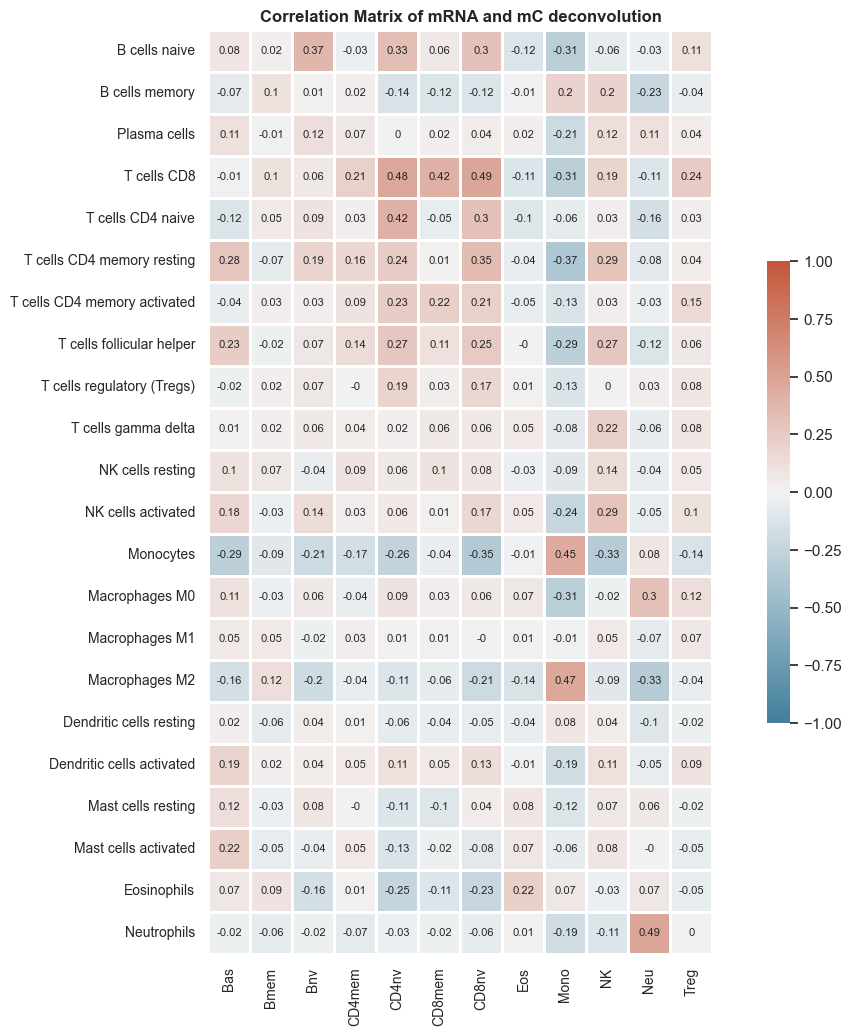

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

# Compute the correlation matrix
#corr = deconv2.corrwith(y_train3, axis=0)
corr=df_corr.astype(float)

# round to 2 decimal places
corr = corr.round(2)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1,vmin=-1, center=0,annot=True,
            square=True, linewidths=1,cbar_kws={"shrink": .5}, annot_kws={"fontsize":8})


# Set plot specs
plt.title('Correlation Matrix of mRNA and mC deconvolution',
            fontsize='medium', y=1,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)